In [224]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


## (1) 데이터 가져오기  
sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.  
diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [225]:
df_X = diabetes.data
df_y = diabetes.target

## (2) 모델에 입력할 데이터 X 준비하기  
df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

## (3) 모델에 예측할 데이터 y 준비하기  
df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [226]:
import numpy as np
import pandas as pd

# np array 변경 
df_X = np.array(df_X)
df_y = np.array(df_y)

W = np.random.rand(10)
b = np.random.rand()

# 데이터 shape, feature 확인
print('shape_x',df_X.shape)
print('shape_y',df_y.shape)

for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

shape_x (442, 10)
shape_y (442,)
feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


s1 - s6 : 당뇨병 진행과 관련된 혈액 내 물질의 농도를 의미하며, 혈당 수치와 관련된 대사 지표로 사용. 다음과 같은 생화학적 수치를 나타낸다.

	s1: 총 콜레스테롤
	s2: 저밀도 지질단백질(LDL) 콜레스테롤
	s3: 고밀도 지질단백질(HDL) 콜레스테롤
	s4: 혈청 트리글리세라이드(중성지방) 수치
	s5: 혈당 수치
	s6: 당화혈색소(HbA1c)

In [ ]:
print('<x_data[0]> : ',x_data[0])
print()
print('<y_data[0]> : ',y_data[0])

## (4) train 데이터와 test 데이터로 분리하기  
X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [227]:
W, b # 파라미터 설정

(array([0.13531305, 0.88097429, 0.48214157, 0.20702874, 0.75024677,
        0.83619975, 0.58298429, 0.98317353, 0.56397309, 0.25428648]),
 0.44928268358536183)

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

## (5) 모델 준비하기  
입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.  
모델 함수를 구현해주세요.

1. 당뇨병 수치 -> 선형회귀 모델 선정
2. feature 10개

In [229]:
def model_diabetes(X, W, b): # y = w1x1 + w2x2 ... w10x10 + b 
                             # 우리는 결국 w와 b 값을 찾고 싶은 것
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


(6) 손실함수 loss 정의하기  
손실함수를 MSE 함수로 정의해주세요.

In [230]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model_diabetes(X, W, b)
    L = MSE(predictions, y)
    return L

(7) 기울기를 구하는 gradient 함수 구현하기  
기울기를 계산하는 gradient 함수를 구현해주세요.

In [231]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model_diabetes(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



(8) 하이퍼 파라미터인 학습률 설정하기  
학습률, learning rate 를 설정해주세요  
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [232]:
# Learning rate 값 3가지 설정 0.01 ~ 0.0001
LEARNING_RATE = 0.0001
LEARNING_RATE2 = 0.001
LEARNING_RATE3 = 0.01
LEARNING_RATE4 = 0.1


(9) 모델 학습하기  
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.  
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.  
입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [233]:

losses = []

# 200000 번 진행 
for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    dW = dW.astype(np.float64)
    db = float(db)
    
    W -= LEARNING_RATE3 * dW # 마치 w' = w - Lg의 과정임. 이로써 dw가 0이 되는 값을 찾아감
    b -= LEARNING_RATE3 * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 21743.8498
Iteration 20 : Loss 16520.9271
Iteration 30 : Loss 13031.4754
Iteration 40 : Loss 10699.3043
Iteration 50 : Loss 9139.7470
Iteration 60 : Loss 8095.9981
Iteration 70 : Loss 7396.6132
Iteration 80 : Loss 6927.1353
Iteration 90 : Loss 6611.1524
Iteration 100 : Loss 6397.6515
Iteration 110 : Loss 6252.5761
Iteration 120 : Loss 6153.1898
Iteration 130 : Loss 6084.3138
Iteration 140 : Loss 6035.8145
Iteration 150 : Loss 6000.9268
Iteration 160 : Loss 5975.1341
Iteration 170 : Loss 5955.4212
Iteration 180 : Loss 5939.7750
Iteration 190 : Loss 5926.8516
Iteration 200 : Loss 5915.7537
Iteration 210 : Loss 5905.8824
Iteration 220 : Loss 5896.8377
Iteration 230 : Loss 5888.3525
Iteration 240 : Loss 5880.2486
Iteration 250 : Loss 5872.4068
Iteration 260 : Loss 5864.7478
Iteration 270 : Loss 5857.2183
Iteration 280 : Loss 5849.7830
Iteration 290 : Loss 5842.4180
Iteration 300 : Loss 5835.1075
Iteration 310 : Loss 5827.8410
Iteration 320 : Loss 5820.6113
Iteration 330

In [ ]:
""" LEARNING_RATE 변형 시도
# LEARNING_RATE2로 진행

losses2 = []
# 
# 2000 번 진행 LEaring
for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    dW = dW.astype(np.float64)
    db = float(db)
    
    W -= LEARNING_RATE2 * dW # 마치 w' = w - Lg의 과정임. 이로써 dw가 0이 되는 값을 찾아감
    b -= LEARNING_RATE2 * db
    L = loss(X_train, W, b, y_train)
    losses2.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


# LEARNING_RATE3로 진행

losses3 = []

# 2000 번 진행 LEaring
for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    dW = dW.astype(np.float64)
    db = float(db)
    
    W -= LEARNING_RATE3 * dW # 마치 w' = w - Lg의 과정임. 이로써 dw가 0이 되는 값을 찾아감
    b -= LEARNING_RATE3 * db
    L = loss(X_train, W, b, y_train)
    losses3.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
"""


(10) test 데이터에 대한 성능 확인하기  
test 데이터에 대한 성능을 확인해주세요.


In [234]:
# 1번째 base 모델
prediction1 = model_diabetes(X_test, W, b)
test_loss = MSE(prediction1, y_test)
print(f"Test Loss: {test_loss:.4f}")



Test Loss: 2866.8403


(11) 정답 데이터와 예측한 데이터 시각화하기  
x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.  

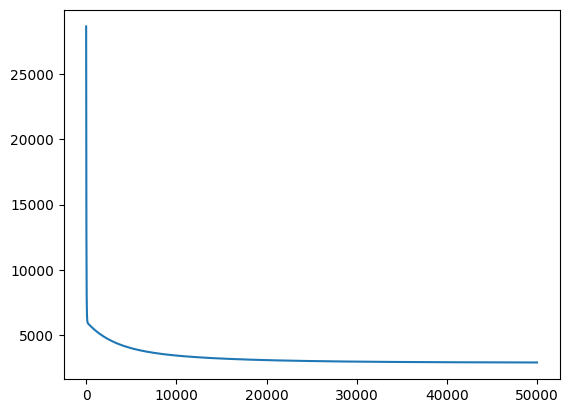

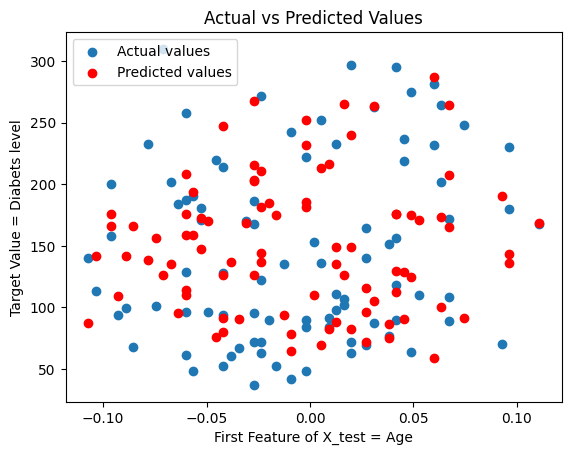

In [237]:
import matplotlib.pyplot as plt

# sex feature를 삭제한 data
plt.plot(losses)
plt.show()

plt.scatter(X_test[:, 0], y_test, label="Actual values")
plt.scatter(X_test[:, 0], prediction2, c='red', label="Predicted values")

plt.xlabel("First Feature of X_test = Age")  # X_test의 첫 번째 특성 = age
plt.ylabel("Target Value = Diabets level")  # 타겟 값 = 당뇨수치

plt.title("Actual vs Predicted Values")
plt.legend()



## loss 줄이기 추가 과정

### (9)-2. X column에서 데이터 선별해보기

In [ ]:
# sex data 제외 
df_X_filter1 = np.delete(df_X, 1, axis=1)  # 1번 인덱스 열(sex) 제거

LEARNING_RATE3 = 0.01

W = np.random.rand(9)
b = np.random.rand()

X_train2, X_test2, y_train2, y_test2 = train_test_split(df_X_filter1, df_y, test_size=0.2, random_state=30)

# sex data 제외, feature 9개로 감소 

losses_filter1 = []

def model_diabetes2(X, W, b): # y = w1x1 + w2x2 ... w10x10 + b 
                             # 우리는 결국 w와 b 값을 찾고 싶은 것
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions



# filter 모델 2000 번 진행 
for i in range(1, 20001):
    dW, db = gradient(X_train2, W, b, y_train2)
    dW = dW.astype(np.float64)
    db = float(db)
    
    W -= LEARNING_RATE3 * dW # 마치 w' = w - Lg의 과정임. 이로써 dw가 0이 되는 값을 찾아감
    b -= LEARNING_RATE3 * db
    L = loss(X_train2, W, b, y_train2)
    losses_filter1.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
# 2번째 sex data 제외 모델 성능 확인
prediction2 = model_diabetes2(X_test2, W, b)
test_loss = MSE(prediction2, y_test2)
print(f"Test Loss: {test_loss:.4f}")



### y 데이터 정규화 해보기

In [ ]:
# y data의 min Max 값
print('min_df_y: {} ' 'Max_df_y: {}'.format(min(df_y), max(df_y))) 

In [ ]:
# y 데이터 정규화, sex 컬럼 제외 기준
y_train_normalized = y_train / 346
y_test_normalized = y_test / 346


# 학습률과 가중치 초기화
LEARNING_RATE = 0.01
W = np.random.rand(9)
b = np.random.rand()

losses_normalized = []

# normalized data, filter 모델 20000 번 진행 
for i in range(1, 200000):
    dW, db = gradient(X_train2, W, b, y_train2)
    dW = dW.astype(np.float64)
    db = float(db)
    
    W -= LEARNING_RATE * dW # 마치 w' = w - Lg의 과정임. 이로써 dw가 0이 되는 값을 찾아감
    b -= LEARNING_RATE * db
    L = loss(X_train2, W, b, y_train2)
    losses_filter1.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



In [ ]:
W, b

In [ ]:
# 2번째 sex data 제외 모델 
prediction3_normalized = model_diabetes2(X_test2, W, b)
test_loss = MSE(prediction3_normalized, y_test2)
print(f"Test Loss: {test_loss:.4f}")

## 다시 기본 예제 돌려보기